# **Analysis of Improper Payments Adjudicated by State Unemployment Agencies**
## Based on how much State Revenue and Federal Funding they received the year prior

#### Author: M. Asif Bhatti
#### Date: December 2021
#### PPOL 564 Final Project

# Table of Contents
1. [Problem Statement and Background](#Problem-Statement-and-Background)
2. [Discussion on methods explored and machine learning models](#Methods-Explored)
3. [Overview of methods and tools used](#Overview-of-methods-and-tools-used)
4. [Discussion of preliminary results](#Discussion-of-preliminary-results)
5. [Lessons learned thus far](#Lessons-learned-thus-far)


# 1. Problem Statement and Background
#### Brief discussion of context on State Unemployment Agencies and their funding sources. 

*DRAFT - FOR DISCUSSION*

## US Unemployment Insurance and State Unemployment Agencies 
The US Unemployment Insurance Program is a social insurance program that aims to complement wages for claimants who have lost a significant amount of their livable wages. 

Resulting from COVID, residents across states were faced with 
1. Safeguarding their **lives** from a deadly pandemic
2. Safeguarding their **livilihoods** from economic decline

Unemployment Agencies in turn had to serve a larger amount of the population at top performance levels. However, there were a number of changes to the program along with issues faced during the 2019-2020 benefits period

## Unemployment Insurance and COVID-19
During COVID-19 state unemployment agencies faced many changes and issues with their programs and processes. </n>
</n>
</n>

| Changes to the Unemployment Program | Challenges faced by Unemployment Agencies |
| ----------- | ----------- |
| <li>Provide an additional $600 per week (PUA) who were collecting regular UC</li> | <li>Highest volume of claimants seen in over a decade |
| <li>Additional Unemployment compensation for servicemembers </li>| <li>Agencies were not equipped to process level of claims inbound |
| <li>Extended benefits for those receiveing benefits </li>| <li>Highest levels of internal and external fraud with low fidelity in fraud monitoring systems |
| <li>Loosened eligibility requirements for claimants </li>| <li>Traditional UI agency processes broke down because of remote-first workplaces |
| <li>Many other programs introduced (PEUC, FPUC, MEUC) </li>| <li>Low technology skills / capabilities within agencies |



Additionally, various state bodies (e.g., Medicare, Medicaid, State Legislatures) inundated unemployment agencies with inquiries regarding processing delays, adjudication issues, or huge backlogs on ID verification issues

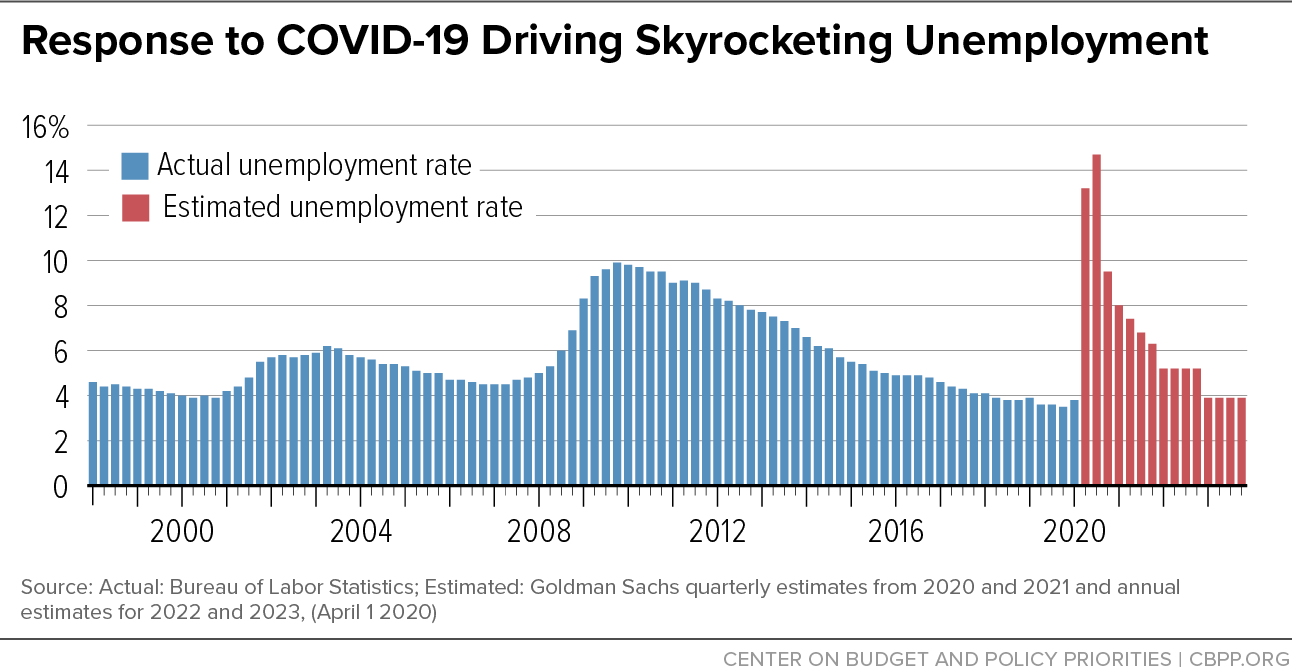

In the inital weeks of the pandemic Unemployment rates surged as business tried to respond to global shutdowns. This left many residents without pay during a pandemic.å

## Hypotheses to test and investigate 
In turn, this study looks to understand how States Unemployment Agencies have performed as a function of technology, federal funding, state revenue, and state capital expenditures over the years. 

The hypotheses we are testing are that:
1. States with **consistent high state revenue** were able to **manage surge in unemployment claims**
2. **States with significant investment in technology outperformed states that underinvested**, by expecting low levels of improper payments made to claimants
3. **States with higher capital expenditure over the years performed better in adjudicating claims** through low levels of improper payments made in. 

# 2. Methods Explored
#### Discussion of data science methods explored to commence research and analysis. Many of the methods explored were not actually used based on data wrangling, structure or processing challenges faced.

*Analysis is still pending and IS NOT complete*

## Data sets explored
I propose to use at least 4 data sources to pull together a primary data cube to run my analysis on. The datasets are as follows (state-level observations): 

1. **[Unemployment Insurance Payment Accuracy Datasets](https://www.dol.gov/agencies/eta/unemployment-insurance-payment-accuracy/data)** from the US Department of Labor -  (1) Amount Paid, (2) Overpayment rate, (3) Improper payment rate, (4) and Fraud rate from 2016-2021

2. **[State Expenditure Report Fiscal 2016-2020](https://www.kff.org/other/state-indicator/per-capita-state-spending/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)** from National Association of State Budget Officers (NASBO) - (1) Per Capita Expenditure 

3. **[Federal support quantified in dollars awarded](https://www.usaspending.gov/state)** from USspending.gov -  (1) Federal dollars awarded 

4. **[State-level revenue and employee expenditures](https://state-local-finance-data.taxpolicycenter.org/pages.cfm)** from the Urban Institute - (1) Employee expenditures, (2) Total Revenue, (3) Total Expenditure.  

## Methods used and challenges uncovered with data

In identifying datasets online, we explored various methodologies to load and structure a data cube. A number of challenges were identified hence our methodology did change. 

| Dataset | Methods explored | Challenges faced |
| ----------- | ----------- | ----------- |
|(1) Unemployment Insurance Payment Accuracy Dataset| <ul><li>Explored XLSX reader and header control</li><li>Data cleaning methods given structure varies across years</li><li>Discovering and creating a unique index to join on</li></ul> | <ul><li>Each 12-month period had a unqiue data structure in an excel sheet</li><li>Column headers were spread across multiple rows (i.e., not in one cell)</li><li>Data was not standardized across years</li></ul>|
|(2) State Expenditure Report Fiscal 2016-2020 | <ul><li>Webscrapping using BeautifulSoup</li><li>Full download and load of expenditure data from 1991-2021</li></ul> |<ul><li>Webscrapping did not always return a table because of wrappers on website to protect from scrappers</li></ul> |
| (3) Federal support quantified in dollars awarded | <ul><li>Webscrapping using BeautifulSoup</li><li>Webscrapping using python HTML readers</li><li>Building a web address scraper to get all data</li></ul> |<ul><li>Google Analytics wrappers on tables in HTML prevented scrapper from seeing data in HTML response</li></ul> |
| (4) State-level revenue and employee expenditures | <ul><li>*Work in progress*</li></ul> | <ul><li>*Work in progress*</li></ul> |

# 3. Overview of methods and tools used

# Methods used and challenges uncovered with data

Overview of methods and and tools used to wrangle data by data source

| Dataset | Methods used | Tools Used |
| ----------- | ----------- | ----------- |
|(1) Unemployment Insurance Payment Accuracy Dataset| <ul><li>Data was only available as an xlsx file, so 12-month unemployment data was downloaded for each year and loaded into a pandas df</li><li>Identified unique row for each row that could be a proxy for column header</li><li>Developed a dictionary to rename columns</li></ul> | <ul><li>XLSX readers to load</li><li>Header and footer function to point pandas to correct row</li><li>Loaded data had NaN rows, which were cleared by left joining unemployment data to a state abbreviation dictionary</li></ul> |
|(2) State Expenditure Report Fiscal 2016-2020| <ul><li>Full data set was downloaded and filtered for each subset of unemployment data</li></ul> | <ul><li>Filter function was used to map to subset of unemployment data</li></ul> |
|(3) & (4) *Other Datasets*| <ul><li>*Work in progress*</li></ul> | <ul><li>*Work in progress*</li></ul> |


### Additionally, aggregate data wrangling methods were used to address:
- Rows with NaNs states were dropped using the aggregate .dropna() function
- A subset for unemployment data for year X was joined to expenditure data for year X-1
- Each subset was built and then was combined using the concat() function
- A single state dictionary with state full name, abbreviation was used to ensure there was a single formatted index to join each subset table on

## Rationale for use of these tools
Overall a number of challenges were uncovered while collating data.
1. Issues scrapping data off of web was mitigated by finding more readily availible and structured data sets
2. Initially, the research was limited to the COVID-years only, but upon additionally data discovery larger data-sets were loaded
3. Additional web-scrapping will be utilizied to add more categorical and continuous variables  that are year and state-specific

## Analysis to be considered:
I will consider conducting a ML analysis of this data across 4 model types - 1) Random Forest, 2) KNN, 3) Baysien, and 4) Decision Tree. At this moment it is a bit early to narrow down onto one. 

# 4. Discussion of preliminary results

## Brief preview of the initial data frame
Below we are sharing the initial data frame we have built with 306 oberservations of states across 2016-2021. There are ~11 independant expenditure and revenue variables we will be looking at for each state with a 1 dependant variable, Improper Payment Rate
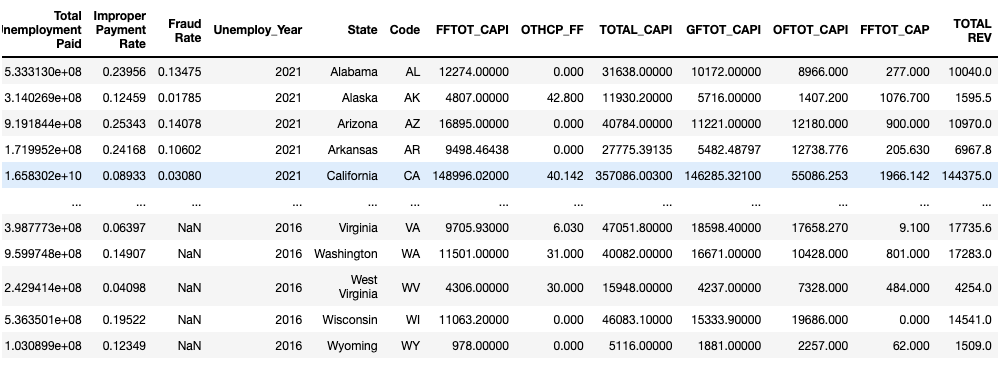

*Any of the strange variables (e.g., FFTOT_CAPI, OTHCP_FF) are all specific revenue or expenditure data for a state for a given year.*

## Assessing missingness
In loading and combining datasets there is overall good coverage of data across each of the variables, with the exception of fraud rate. The Department of Labor has not simply reported fraud rate until recently where it became a very big issue during COVID. 
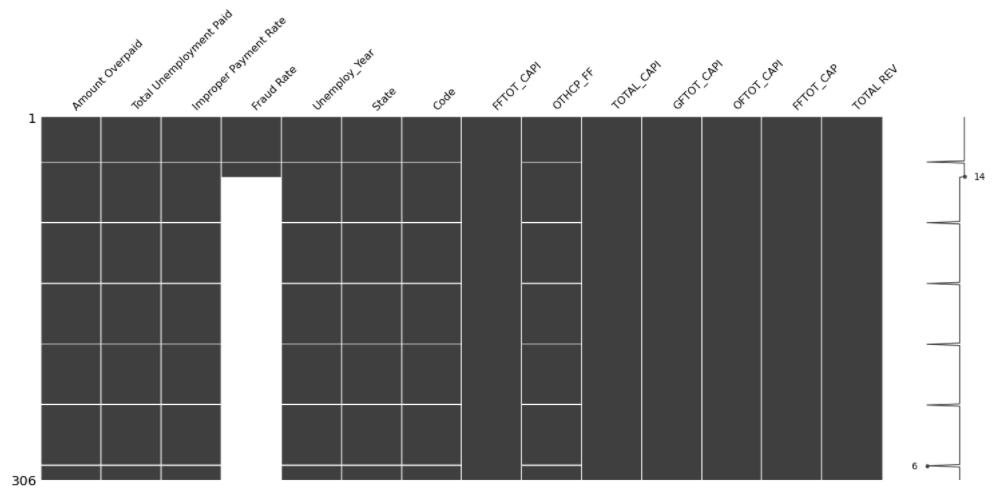

## Exploring the training set
The variables overall have a heavy right skew which does lead us to want to log the variables to see if there is a gaussian distribution observed after the logging. 

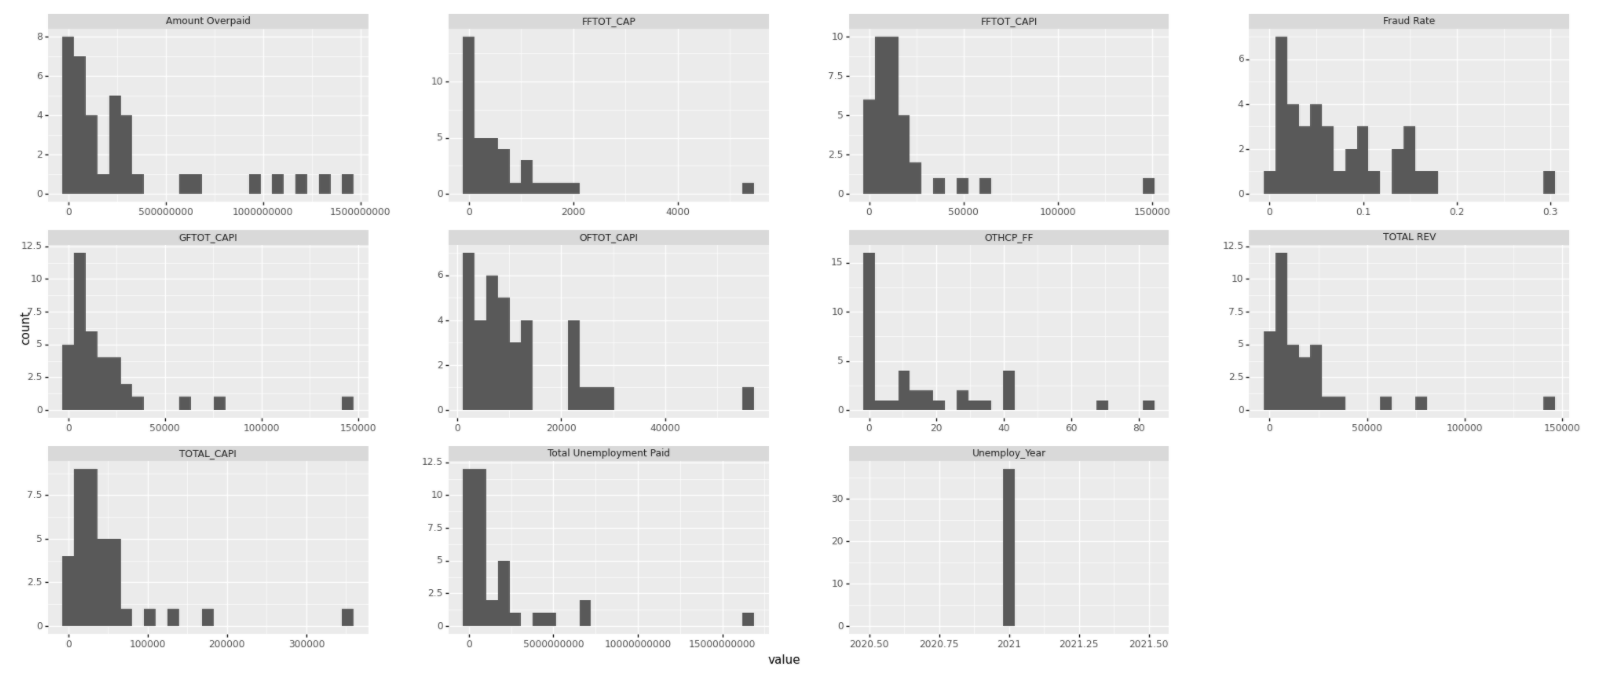

# 5. Lessons learned thus far
## There have been many lessons learned to date. To enumerate a few:
1. Collecting data and structuring it is 80% of the lift when conducting any analysis 
2. Publically reported data is not clean and hence requires a lot of prep prior to loading
3. Collecting features or variables specific to our hypotheses will take additional data discovery in order to truly build an informative model
4. Publically available data can be hard to scrap given html wrappers and propietary sources
5. Subsequent analyses of this data will be relatively straightforward once data frame / cube is developed

## Additionally, if there are foreseable challenges, we plan to mitigate them with:
1. Increasing the number of features that could predict or have relationship with the dependant variable (i.e., improper payment)
2. Invest additional time upfront to develop a meaningful data set to train and test the model off of